In [1]:
import torch
from torch.nn.functional import softmax
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tensor = torch.randn((5, 5),requires_grad=True)
tensor

tensor([[-0.5807, -2.2313,  1.3781, -0.0922,  1.7117],
        [-0.1169, -1.0691, -2.8541,  0.7595,  0.2665],
        [ 0.5681,  0.5372, -0.6045, -0.1977,  0.2620],
        [ 1.6247,  1.5380, -0.4566,  0.8513,  0.1407],
        [-0.0832, -0.0304, -1.0393, -0.5744,  0.5001]], requires_grad=True)

In [3]:
def spatial_softmax2d(tensor):
    p = torch.reshape(softmax(torch.reshape(tensor, (-1,)), dim=0), tensor.shape)
    grid_y, grid_x = torch.meshgrid(torch.arange(0, tensor.shape[0]), torch.arange(0, tensor.shape[1]))
    x = torch.sum(grid_x.float() * p)
    y = torch.sum(grid_y.float() * p)
    return p, x, y

p, x, y = spatial_softmax2d(tensor)
p, x, y

(tensor([[0.0139, 0.0027, 0.0985, 0.0226, 0.1375],
         [0.0221, 0.0085, 0.0014, 0.0531, 0.0324],
         [0.0438, 0.0425, 0.0136, 0.0204, 0.0323],
         [0.1261, 0.1156, 0.0157, 0.0582, 0.0286],
         [0.0228, 0.0241, 0.0088, 0.0140, 0.0409]], grad_fn=<ViewBackward>),
 tensor(2.0609, grad_fn=<SumBackward0>),
 tensor(1.8974, grad_fn=<SumBackward0>))

In [4]:
target_tensor = torch.randn((5, 5))
target, target_x, target_y = spatial_softmax2d(target_tensor)
target, target_x, target_y

(tensor([[0.0064, 0.0162, 0.0338, 0.0196, 0.0105],
         [0.0397, 0.1393, 0.0025, 0.0596, 0.0266],
         [0.0138, 0.0140, 0.0341, 0.0768, 0.0102],
         [0.1028, 0.0778, 0.0261, 0.0582, 0.0802],
         [0.0300, 0.0364, 0.0730, 0.0080, 0.0041]]),
 tensor(1.8162),
 tensor(2.2076))

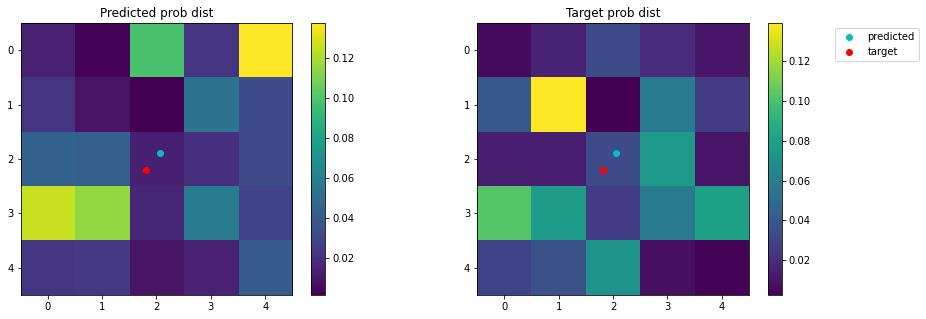

In [5]:
def plot_figure(p, predictions, target, target_x, target_y):
    xs = [x.detach().numpy() for (x, y) in predictions]
    ys = [y.detach().numpy() for (x, y) in predictions]
    
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(p.detach().numpy(), cmap='viridis', extent=(-0.5, p.shape[1] - 0.5, p.shape[0] - 0.5, -0.5))
    plt.colorbar()
    plt.plot(xs, ys, 'co')
    plt.plot(target_x.detach().numpy(), target_y.detach().numpy(), 'ro')
    plt.title("Predicted prob dist")

    plt.subplot(1, 2, 2)
    plt.imshow(target.detach().numpy(), cmap='viridis', extent=(-0.5, p.shape[1] - 0.5, p.shape[0] - 0.5, -0.5))
    plt.colorbar()
    plt.plot(xs, ys, 'co')
    plt.plot(target_x.detach().numpy(), target_y.detach().numpy(), 'ro')
    plt.title("Target prob dist")
    plt.legend(['predicted', 'target'], loc='upper left', bbox_to_anchor=(1.3, 1))
    plt.show()
    
plot_figure(p, [(x, y)], target, target_x, target_y)

In [6]:
predictions = []

# Run this multiple times with Ctrl+Enter
To test the negative learning, set negative=True in gradient_step() call.

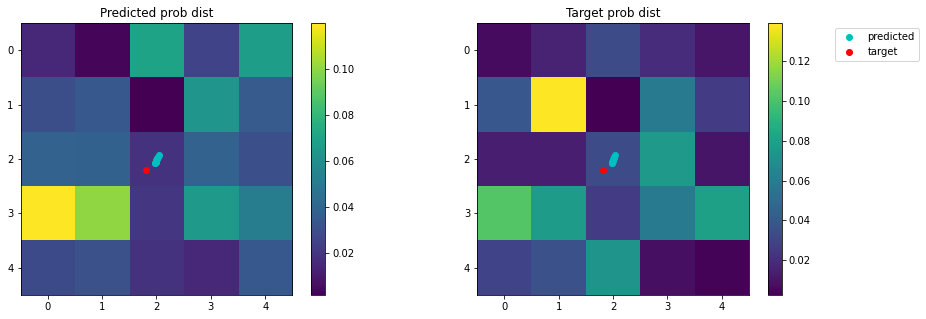

tensor(3.1891, grad_fn=<NegBackward>)

In [7]:
def gradient_step(tensor, p, target, lr=1.0, negative=False):
    loss = -torch.sum(target * torch.log(p))
    if negative:
        loss = -loss
    loss.backward()
    with torch.no_grad():
        tensor -= lr * tensor.grad
        tensor.grad.zero_()
    return loss

for _ in range(10):
    loss = gradient_step(tensor, p, target, negative=False)
    p, x, y = spatial_softmax2d(tensor)
    predictions.append((x, y))
plot_figure(p, predictions, target, target_x, target_y)
loss

In [8]:
tensor

tensor([[-0.6638, -2.1004,  0.8698, -0.1405,  0.8339],
        [ 0.0184,  0.1446, -2.8451,  0.7637,  0.1875],
        [ 0.2829,  0.2650, -0.4268,  0.2819,  0.0428],
        [ 1.4033,  1.2245, -0.3759,  0.8024,  0.5514],
        [-0.0409,  0.0558, -0.4398, -0.6436,  0.1563]], requires_grad=True)